# Python Homework 3

**Release date:** Friday, February 12<br>
**Due date:** Friday, February 26, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW3_YOURPERMNUMBER.ipynb__.


Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (10 Points)

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$). 


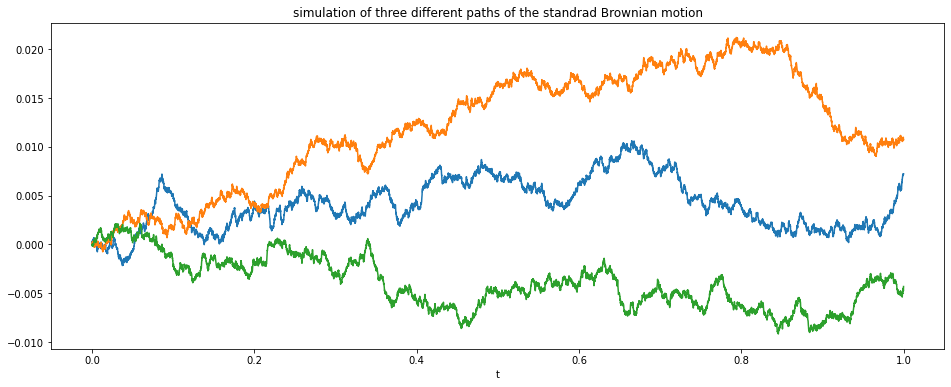

In [2]:
tstart, tend = 0, 1  # time interval
n = 10000  # number of steps
stepsize = (tend-tstart)/n
N = 3  # number of paths

# different path of a standard Brownian motion
Bs = np.zeros((n+1, N))
# time
t = np.linspace(tstart, tend, n+1)

for i in range(1, n+1):
    Bs[i,:] = np.random.normal(0, stepsize, size=N) + Bs[i-1,:]

plt.figure(figsize=(16,6))
plt.plot(t, Bs)
plt.xlabel('t')
plt.title('simulation of three different paths of the standrad Brownian motion')
plt.show()

2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

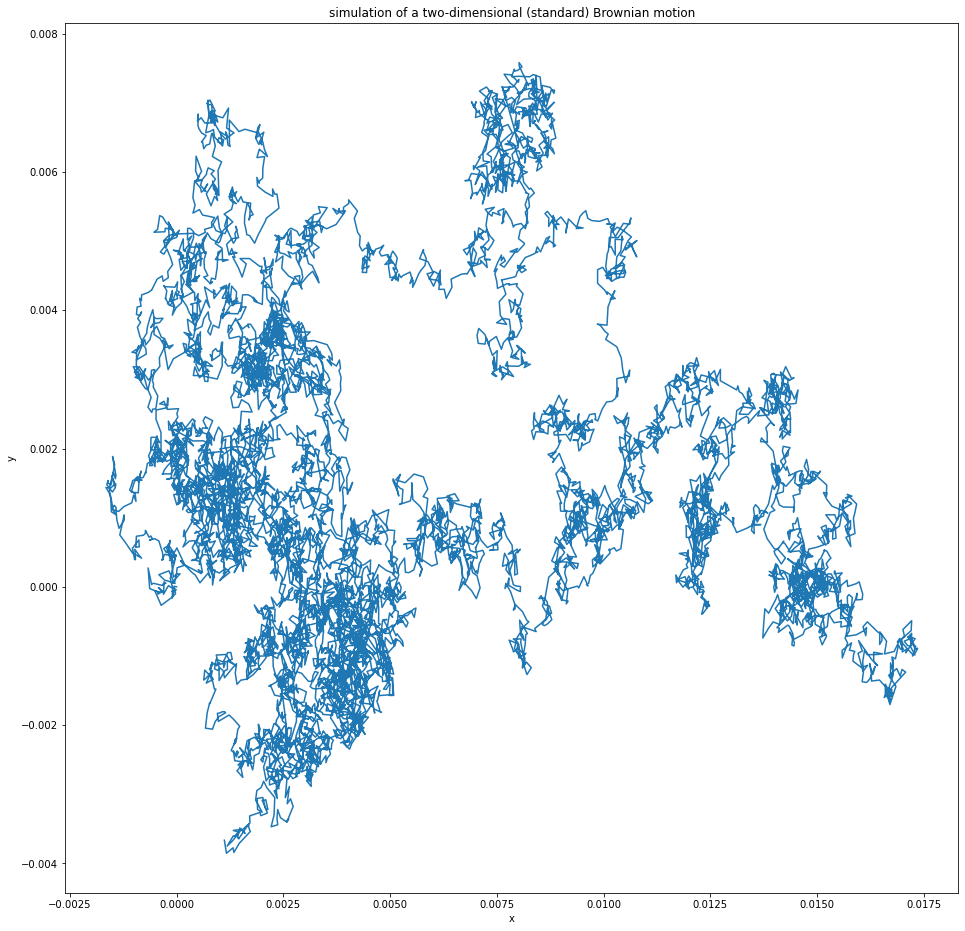

In [3]:
tstart, tend = 0, 1  # time interval
n = 10000  # number of steps
stepsize = (tend-tstart)/n
N = 2  # number of paths

# different path of a standard Brownian motion
Bs = np.zeros((n+1, N))

for i in range(1, n+1):
    Bs[i,:] = np.random.normal(0, stepsize, size=N) + Bs[i-1,:]

plt.figure(figsize=(16,16))
plt.plot(Bs[:,0], Bs[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('simulation of a two-dimensional (standard) Brownian motion')
plt.show()

##### Problem 2 (10 Points)

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by 

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



1. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

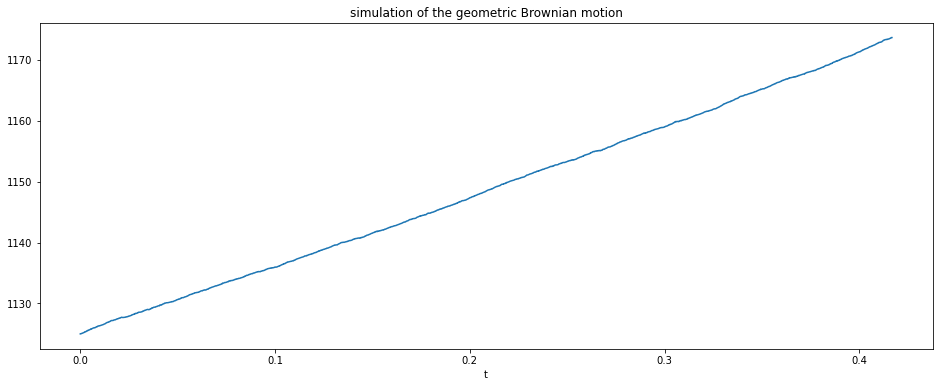

In [4]:
# parameters
mu = 0.1
sigma = 0.176
S0 = 1125

T = 5/12
n = 10000  # number of steps
stepsize = T/n

# standard Brownian motion
Bt = 0

# path of geometric Brownian motion
S = np.zeros(n+1)
S[0] = S0

# time
t = np.linspace(0, T, n+1)

for i in range(1, n+1):
    Bt += np.random.normal(0, stepsize)
    S[i] = S0*np.exp(mu*t[i]+sigma*Bt)

plt.figure(figsize=(16,6))
plt.plot(t, S)
plt.xlabel('t')
plt.title('simulation of the geometric Brownian motion')
plt.show()

2. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

In [5]:
num = 10000  # number of simulation

def one_simulation():
    # parameters
    mu = 0.1
    sigma = 0.176
    S0 = 1125

    T = 5/12
    n = 10000  # number of steps
    stepsize = T/n

    # standard Brownian motion
    Bt = 0

    # geometric Brownian motion
    St = S0
    Smin = S0

    for i in range(1, n+1):
        # update St
        Bt += np.random.normal(0, stepsize)
        St = S0*np.exp(mu*stepsize*i+sigma*Bt)
        
        if St < Smin:
            Smin = St
    
    return St - Smin

# running many times to simulate this process
payoffs = np.zeros(num)
for i in range(num):
    payoffs[i] = one_simulation()

print('an approximation of the future expected payoff of this option is')
print(np.mean(payoffs))

an approximation of the future expected payoff of this option is
47.87505574783512
